# Building a Regression Model

## Defining the problem

#### Can we estimate the Price of a used car based on Kilometers_Driven, Transmission, Fuel Type, Engine, Power and Mileage?

## Data Collection
The dataset utilized in this case study is from India and its publicly available, making it accessible to all contributing to the credibility of the data. One can access it through here [link](https://www.kaggle.com/code/yogidsba/predict-used-car-prices-linearregression?cellIds=6&kernelSessionId=65429751).
The dataset has the following features:
  1. **S.No. :** Serial Number
  2. **Name :** Name of the car which includes Brand name and Model name
  3. **Location :** The location in which the car is being sold or is available for purchase Cities
  4. **Year :** Manufacturing year of the car
  5. **Kilometers_driven :** The total kilometers driven in the car by the previous owner(s) in KM.
  6. **Fuel_Type :** The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
  7. **Transmission :** The type of transmission used by the car. (Automatic / Manual)
  8. **Owner :** Type of ownership
  9. **Mileage :** The standard mileage offered by the car company in kmpl or km/kg
  10. **Engine :** The displacement volume of the engine in CC.
  11. **Power :** The maximum power of the engine in bhp.
  12. **Seats :** The number of seats in the car.
  13. **New_Price :** The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
  14. **Price :** The price of the used car in INR Lakhs (1 Lakh = 100, 000)

## Data Preparation and Exploration

We'll start by importing the necessary libraries

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import joblib
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [2]:
#lets load our dataset
data=pd.read_csv("used_cars_data.csv")
display(data.head())
print(f"Shape of the dataset: {data.shape}","\n")
print(f"Information on the dataset: {data.info()}","\n")

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


Shape of the dataset: (7253, 14) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB
Information on the dataset

Lets subset our target variable and the features

In [3]:
#lets strip the columns first to remove any leading or trailing whitespaces
data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [4]:
#subsetting our dataset
df=data[["Kilometers_Driven","Fuel_Type","Transmission","Mileage","Engine","Power","Price"]]

In [5]:
display(df.head())
print(f"Shape of the dataset: {df.shape}","\n")
print(f"Information of the dataset: {df.info()}","\n")
print(f"Missing values present: {df.isna().sum()}","\n")
print(f"Duplicated values present: {df.duplicated().sum()}","\n")
print(f"Number distinct value: {df[["Fuel_Type","Transmission"]].nunique()}","\n")

,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Price
0,72000,CNG,Manual,26.6 km/kg,998 CC,58.16 bhp,1.75
1,41000,Diesel,Manual,19.67 kmpl,1582 CC,126.2 bhp,12.50
2,46000,Petrol,Manual,18.2 kmpl,1199 CC,88.7 bhp,4.50
3,87000,Diesel,Manual,20.77 kmpl,1248 CC,88.76 bhp,6.00
4,40670,Diesel,Automatic,15.2 kmpl,1968 CC,140.8 bhp,17.74


Shape of the dataset: (7253, 7) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Kilometers_Driven  7253 non-null   int64  
 1   Fuel_Type          7253 non-null   object 
 2   Transmission       7253 non-null   object 
 3   Mileage            7251 non-null   object 
 4   Engine             7207 non-null   object 
 5   Power              7207 non-null   object 
 6   Price              6019 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 396.8+ KB
Information of the dataset: None 

Missing values present: Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Mileage                 2
Engine                 46
Power                  46
Price                1234
dtype: int64 

Duplicated values present: 21 

Number distinct value: Fuel_Type       5
Transmission    2
dtype: int64 



Findings after exploring the dataset
* Our feature columns have missing values
* Our feature columns need formatting i.e we need to remove their units of measurement
* Our target variable values need to be formatted to its unit


### Data Transformation

We'll start by removing duplicated and missing values in our data

In [6]:
#removing duplicated values
df=df.copy()
df.drop_duplicates(inplace=True)
print(f"Duplicate values present :{df.duplicated().any()}")

Duplicate values present :False


In [7]:
#dropping off the null values
df=df.dropna()

In [8]:
#checking if null values exist
df.isna().sum()

Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Mileage              0
Engine               0
Power                0
Price                0
dtype: int64

In [9]:
#checking the number of new rows and columns we have in our dataset 
df.shape

(5972, 7)

As we saw from the information about the dataset, most of the features are objects. We will need to change them to numeric features as well as deal with missing values. 

In [10]:
#lets clean up the Mileage feature
df.loc[:, "Mileage"] = (
    df["Mileage"]
    .str.replace("km/kg", "", regex=False)
    .str.replace("kmpl", "", regex=False)
)
df["Mileage"]=pd.to_numeric(df["Mileage"])

In [11]:
#cleaning the Engine feature
df.loc[:,"Engine"]=(
    df["Engine"]
    .str.replace("CC","")
)
df["Engine"]=pd.to_numeric(df["Engine"], errors="coerce")

In [12]:
#Cleaning the Power feature
df["Power"] = df["Power"].str.replace("bhp", "", regex=False)
df["Power"] = df["Power"].str.strip()  
df["Power"] = df["Power"].replace('null', np.nan)
df.dropna(subset=["Power"],inplace=True)
df["Power"] = pd.to_numeric(df["Power"] , errors="coerce")

In [13]:
#lets change fuel_type and transmission to categorical
df["Fuel_Type"]=df["Fuel_Type"].astype("category")
df["Transmission"]=df["Transmission"].astype("category")

In [14]:
#lets change the price units
df["Price"]=df["Price"].mul(100000)

Lets check if our data is now ready for analysis

In [15]:
display(df.head())
print(f"Shape of the dataset: {df.shape}","\n")
print(f"Dataset information: {df.info()}","\n")
print(f"Missing values present: {df.isna().any()}","\n")

,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Price
0,72000,CNG,Manual,26.60,998,58.16,175000.0
1,41000,Diesel,Manual,19.67,1582,126.20,1250000.0
2,46000,Petrol,Manual,18.20,1199,88.70,450000.0
3,87000,Diesel,Manual,20.77,1248,88.76,600000.0
4,40670,Diesel,Automatic,15.20,1968,140.80,1774000.0


Shape of the dataset: (5865, 7) 

<class 'pandas.core.frame.DataFrame'>
Index: 5865 entries, 0 to 6018
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Kilometers_Driven  5865 non-null   int64   
 1   Fuel_Type          5865 non-null   category
 2   Transmission       5865 non-null   category
 3   Mileage            5865 non-null   float64 
 4   Engine             5865 non-null   int64   
 5   Power              5865 non-null   float64 
 6   Price              5865 non-null   float64 
dtypes: category(2), float64(3), int64(2)
memory usage: 286.7 KB
Dataset information: None 

Missing values present: Kilometers_Driven    False
Fuel_Type            False
Transmission         False
Mileage              False
Engine               False
Power                False
Price                False
dtype: bool 



In [16]:
#checking the unique values in the categorical features
print(f"Fuel types: {df["Fuel_Type"].unique()}","\n")
print(f"Transimission types: {df["Transmission"].unique()}","\n")

Fuel types: ['CNG', 'Diesel', 'Petrol', 'LPG']
Categories (4, object): ['CNG', 'Diesel', 'LPG', 'Petrol'] 

Transimission types: ['Manual', 'Automatic']
Categories (2, object): ['Automatic', 'Manual'] 



### Exploratory Data Analysis

In [17]:
#summary statistics of numerical features
numerical_features=["Kilometers_Driven","Mileage","Engine","Power","Price"]
display(df[numerical_features].describe())

,Kilometers_Driven,Mileage,Engine,Power,Price
count,5.865000e+03,5865.000000,5865.000000,5865.000000,5.865000e+03
mean,5.833362e+04,18.270980,1625.924808,113.283124,9.605202e+05
std,9.222127e+04,4.371238,601.486089,53.865665,1.125321e+06
min,1.710000e+02,0.000000,624.000000,34.200000,4.400000e+04
25%,3.345000e+04,15.260000,1198.000000,75.000000,3.520000e+05
50%,5.262500e+04,18.200000,1496.000000,97.700000,5.750000e+05
75%,7.242500e+04,21.100000,1991.000000,138.100000,1.000000e+06
max,6.500000e+06,33.540000,5998.000000,560.000000,1.600000e+07


* From the summary statistics,we note that:

**Kilometers_Driven:** The average kilometers driven is about 58,334 km. The high standard deviation 92,221km suggests a wide variation in the kilometers driven among cars. The minimum value is 170 km, indicating a nearly new vehicle, while the maximum is 6,500,000 km, which is extremely high and possibly an outlier or data entry error. When we look at the quantiles 25% of the cars have been driven up to 33,450 km, 50% have been driven up to 52,625 km and 75% have been driven up to 72,425 km. The data shows significant variability in the kilometers driven by different cars. The extremely high maximum value suggests the presence of outliers that may need to be addressed during data preprocessing.

**Mileage:** The average mileage is around 18.27 km per liter.A standard deviation of 4.37 indicates moderate variability in mileage. The minimum mileage is 0 km/l, which may indicate missing data or outliers, while the maximum is 33.54 km/l, likely representing a fuel-efficient vehicle. Looking at theh quantiles, 25% of vehicles have a mileage below 15.26 km/l,50% is around 18.2 km/l and 75% of vehicles have a mileage below 21.1 km/l.
We can conclude that Mileage values show moderate variability, with some outliers. Handling missing or erroneous values such as 0 km/l would be essential for accurate modeling.

**Engine:** The average engine size is 1625.92 cc. The standard deviation is relatively high at 601.49, indicating variability in engine sizes.The minimum engine size is 624 cc, while the maximum is 5998 cc, indicating a range from small to very large engines. The quantiles also give us some insights; 25% of vehicles have an engine size of up to 1198 cc,50% is 1496 cc and 75% of vehicles have an engine size of up to 1991 cc.
This summamry statistics indicate the engine size varies widely among vehicles. The large range from 624 cc to 5998 cc suggests the dataset includes a mix of compact, mid-sized, and large vehicles.

**Power:** The average power is about 113.28 bhp.The standard deviation of 53.87 indicates a wide range of power ratings.The minimum power is 34.2 bhp, while the maximum is 560 bhp, showing a significant variation. Moreover, 25% of vehicles have power below 75 bhp,50% is 97.7 bhp and 75% of vehicles have power up to 138.1 bhp. Looks like there is a wide range in the power of vehicles, with some extremely high values that could be outliers or represent high-performance vehicles.

**Price:** The average price is around 9.61 Lakhs.A high standard deviation of 11.25 suggests substantial variability in car prices.The minimum price is 0.44, and the maximum is 160, indicating a huge range of vehicle prices, from very cheap to very expensive cars. Also 25% of vehicles are priced below 3.52,50% is 5.75 and 75% of vehicles are priced below 10. The Price variable shows substantial variability, which indicates that several factors could significantly influence the price, such as vehicle type, condition, and features. The extreme values (0.44 and 160) could be outliers and might need further investigation. 

In [18]:
#lets see how the values are distributed in the Transmission and Fuel Type features
print(df["Transmission"].value_counts(),"\n")
print(df["Fuel_Type"].value_counts(),"\n")

Transmission
Manual       4165
Automatic    1700
Name: count, dtype: int64 

Fuel_Type
Diesel    3148
Petrol    2652
CNG         55
LPG         10
Name: count, dtype: int64 



In [19]:
#lets take a look at the summary statistics of categorical features
categorical_features=["Fuel_Type","Transmission"]
display(df[categorical_features].describe())

,Fuel_Type,Transmission
count,5865,5865
unique,4,2
top,Diesel,Manual
freq,3148,4165


From the summary statistics we note that:

**Fuel_Type:** The count tells us there are 5,865 records for Fuel_Type, indicating no missing values. Unique indicates that there are 4 unique values for Fuel_Type: **CNG, Diesel, Petrol**, and **LPG**.Top means the most frequent value which in our case is Diesel. Freq is the top value which is Diesel and it has appeared 3,148 times, which is about 50% of the total records. Diesel cars are the most prevalent in this dataset, making up more than half of the total entries. This dominance could be due to factors such as better fuel efficiency, lower fuel costs in some regions, or consumer preferences. When building a predictive model for Price, the Fuel_Type feature is likely to be significant since there are clear distinctions between types. The price variation between diesel, petrol, CNG, and LPG cars should be explored further to understand how they affect car prices.

**Transmission**: There are 5,865 records for Transmission, indicating no missing values.There are 2 unique values for Transmission: **Manual** and **Automatic** the most common transmission being Manual. The most frequent top value is Manual which has appeared 4,165 times, which is about 70% of the total records. Manual transmission is the predominant type in this dataset, accounting for about 71% of the vehicles. This could reflect market trends, customer preferences for manual cars due to better control and fuel efficiency, or a higher proportion of budget cars in the dataset that typically come with manual transmission.Since a substantial majority of cars have manual transmission, the Transmission feature is important for predicting car prices. Manual and automatic cars often have different pricing structures, and this needs to be factored in when building the model.

### Data visualisation
Visualizing data provides a clear and detailed view of our information. Let's create visualizations to support and strengthen our findings from the summary statistics

Lets perform a **univariate analysis** whereby we analyze each feature independently to understand its distribution and check for outliers. For numerical features we'll use histograms, box plots, and descriptive statistics to explore distributions, identify outliers and understand central tendencies whereas categorical features we'll use bar plots to understand the distribution of categories for Fuel_Type and Transmission.

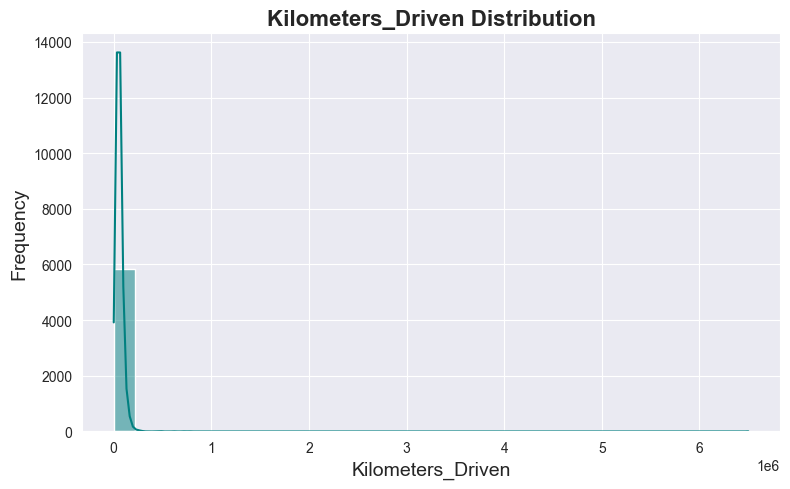

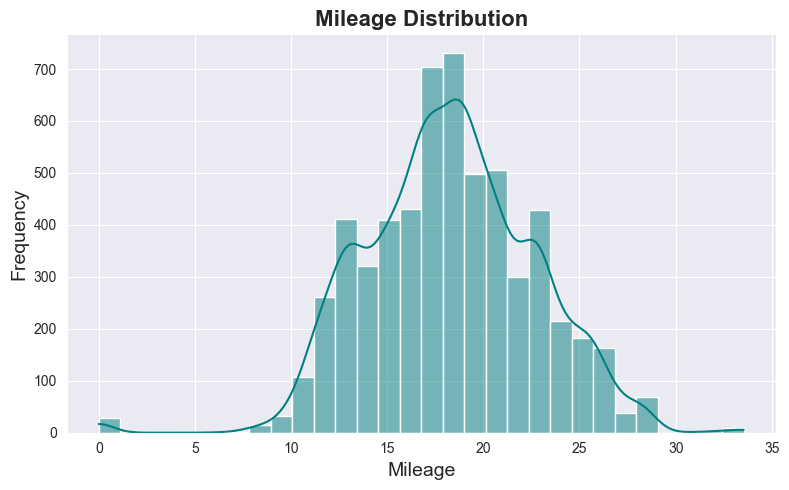

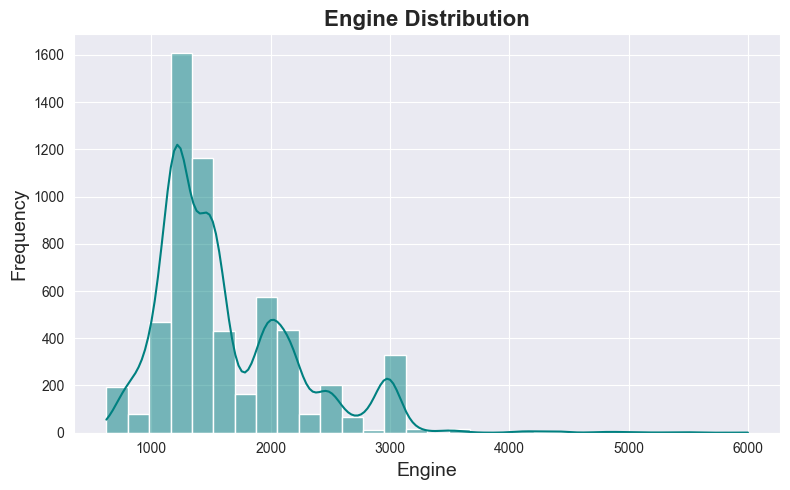

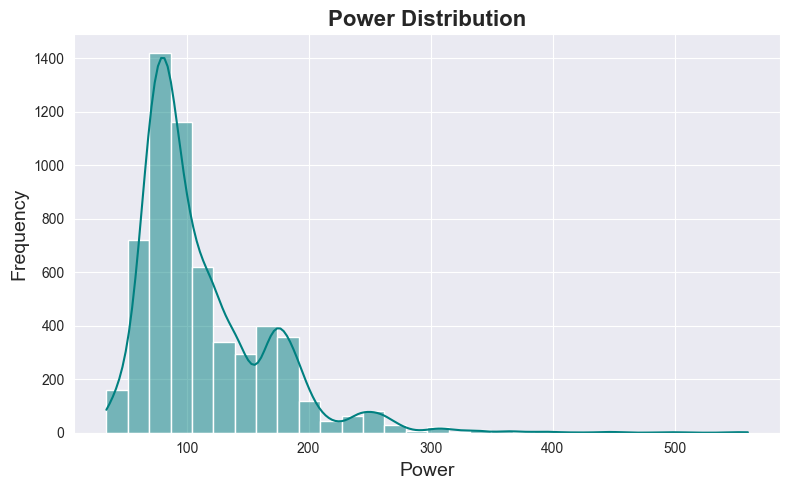

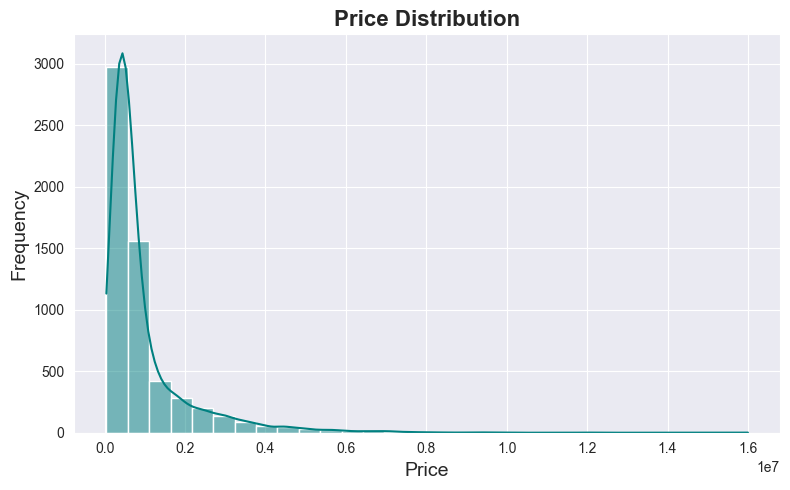

In [20]:
#lets plot histograms for our numerical features
sns.set_style("darkgrid")
for feature in numerical_features:
    plt.figure(figsize=(8, 5)) 
    sns.histplot(df[feature], bins=30, color="teal", kde=True)
    plt.title(f"{feature} Distribution", fontsize=16, fontweight="bold")
    plt.xlabel(feature, fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.grid(True, linestyle="solid")
    plt.tight_layout()
    plt.show()

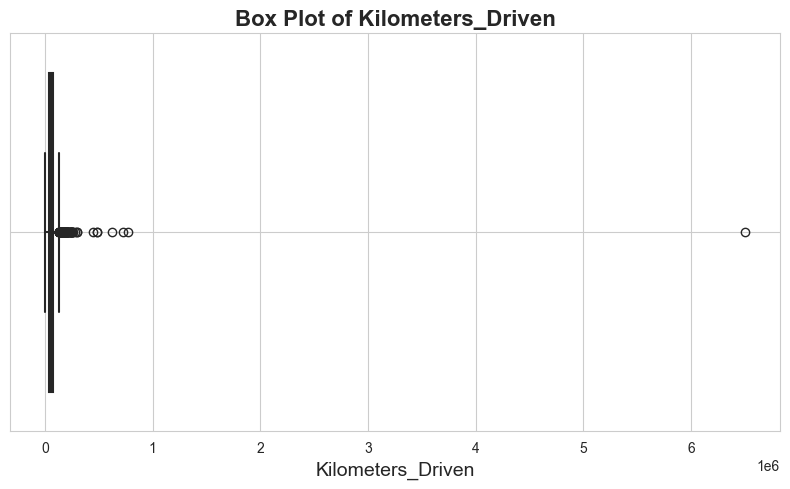

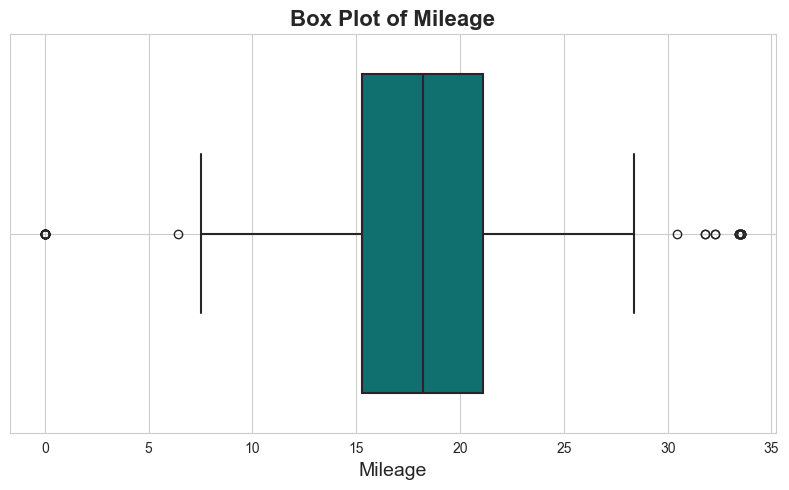

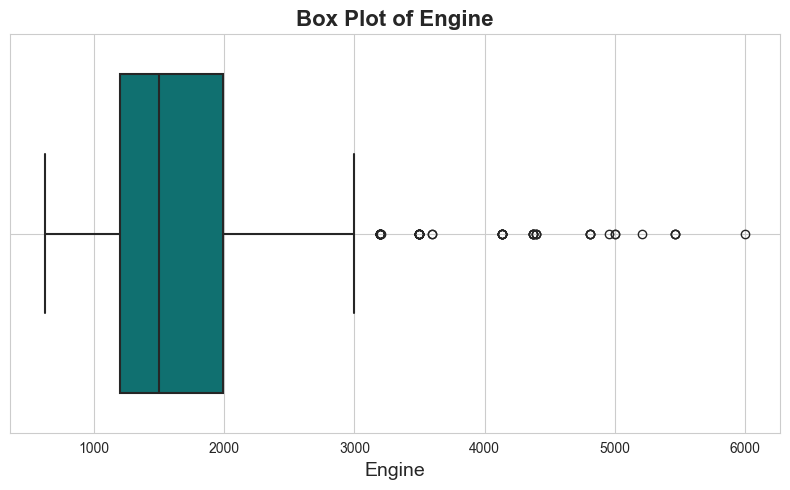

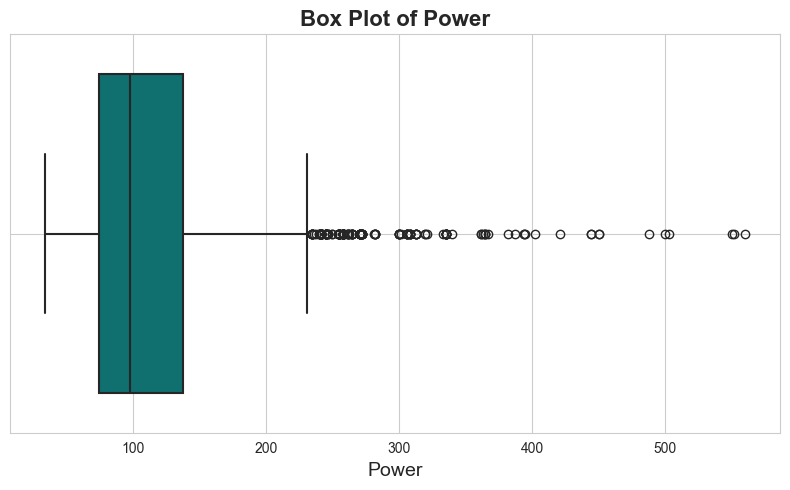

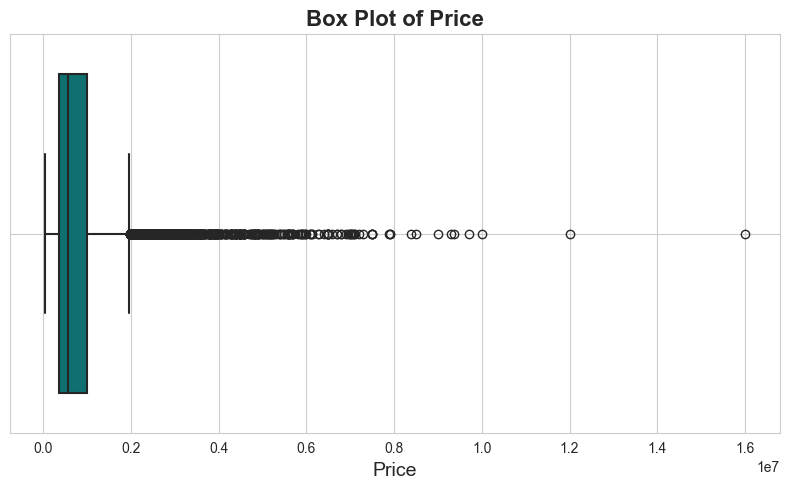

In [21]:
#lets plot boxplot for the numerical features
sns.set_style("whitegrid")
for feature in numerical_features:
    plt.figure(figsize=(8, 5))  # Increase figure size for readability
    sns.boxplot(x=df[feature], color="teal", linewidth=1.5)  # Thicker lines for more definition
    plt.title(f'Box Plot of {feature}', fontsize=16, fontweight="bold")
    plt.xlabel(feature, fontsize=14)
    plt.grid(True,linestyle="solid")
    plt.tight_layout()
    plt.show()

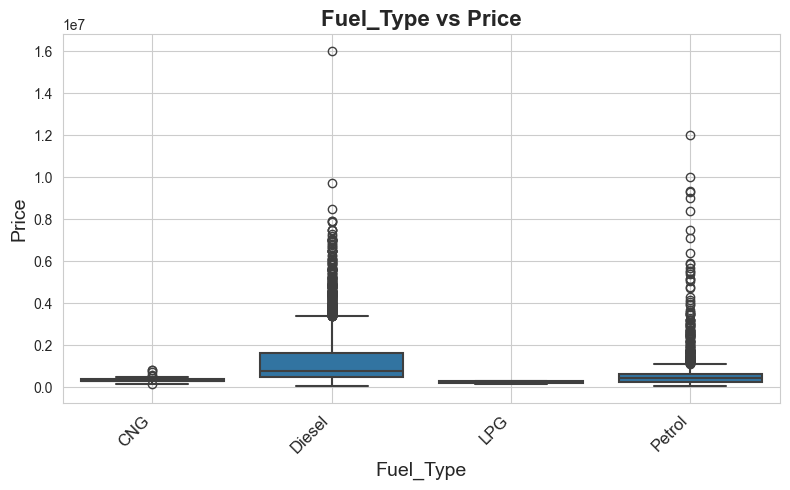

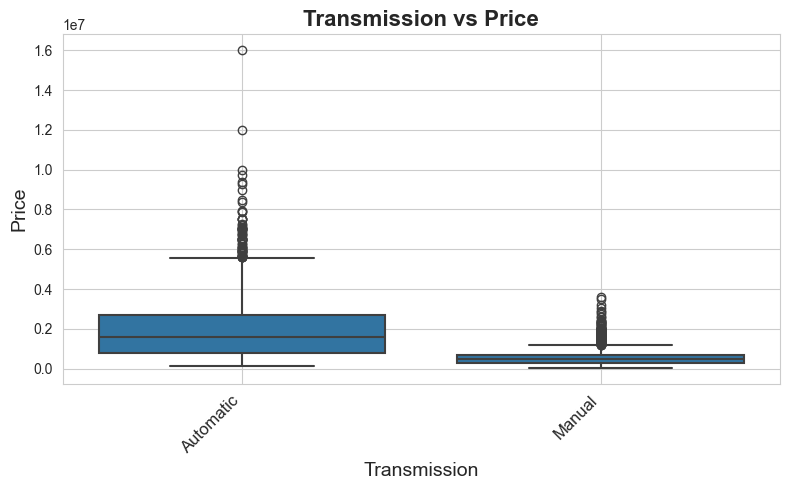

In [22]:
#lets plot boxplots for the categorical features
sns.set_style("whitegrid")
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[feature], y=df["Price"], linewidth=1.5)
    plt.xticks(rotation=45, ha="right",fontsize=12)
    plt.title(f"{feature} vs Price", fontsize=16, fontweight="bold")
    plt.xlabel(feature, fontsize=14)
    plt.ylabel("Price", fontsize=14)
    plt.grid(True, linestyle="solid")
    plt.tight_layout()
    plt.show()

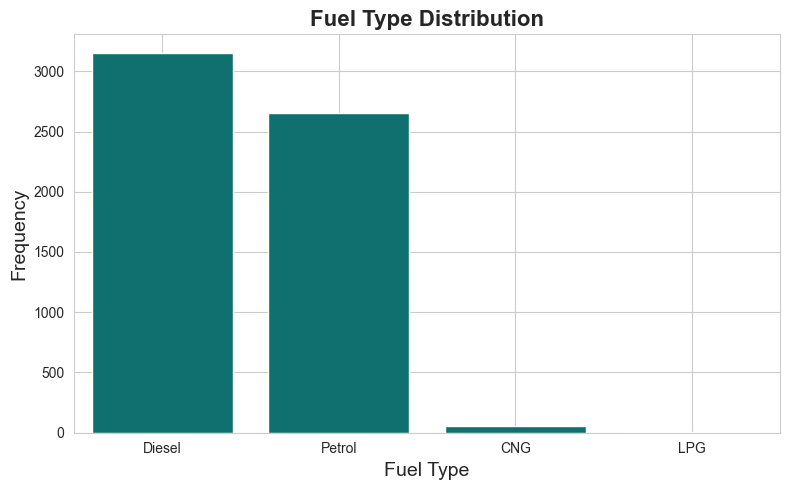

In [23]:
#lets plot a bar plot of Fuel Type distribution
fuel_counts = df["Fuel_Type"].value_counts(ascending=False)
fuel_types = fuel_counts.index
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
ax = sns.countplot(data=df, x="Fuel_Type", color="teal", order=fuel_types)
plt.title("Fuel Type Distribution", fontsize=16, fontweight="bold")
plt.xlabel("Fuel Type", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True, linestyle="solid")
plt.tight_layout()
plt.show()

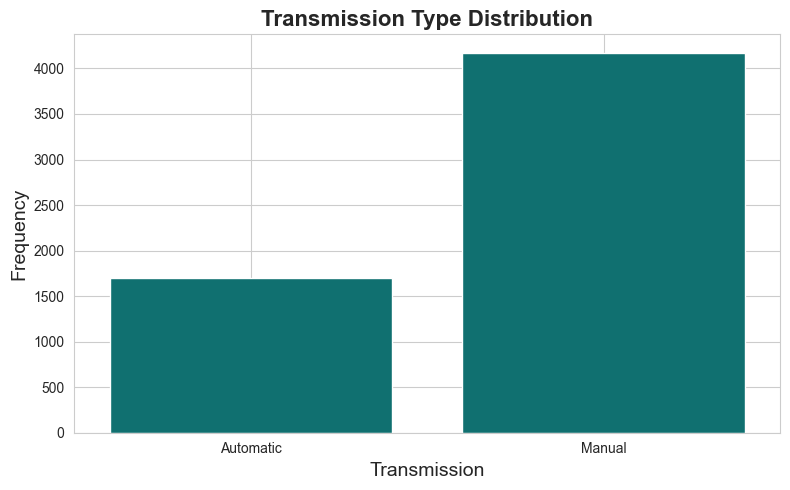

In [24]:
# Plot for Transmission Type Distribution
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x="Transmission", color="teal")
plt.title("Transmission Type Distribution", fontsize=16, fontweight="bold")
plt.xlabel("Transmission", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True,linestyle="solid")
plt.tight_layout()
plt.show()

Lets do a **bivariate analysis** to analyze the relationship between features and the target variable Price. For numerical features we'll plot scatter plots and correlation matrices to understand the relationship between numerical features and Price while categorical features we'll use box plots to explore how different categories affect the Price.

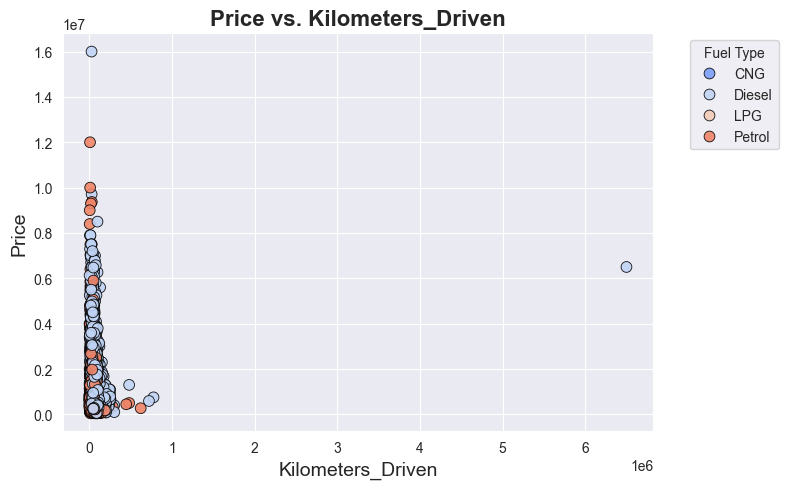

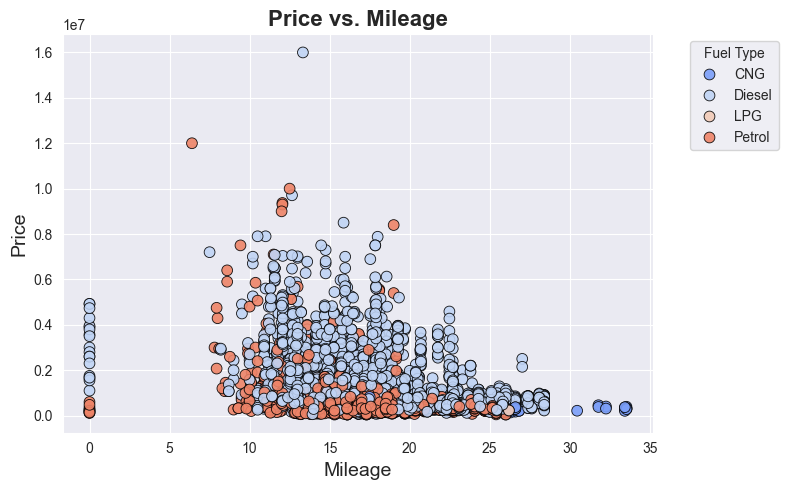

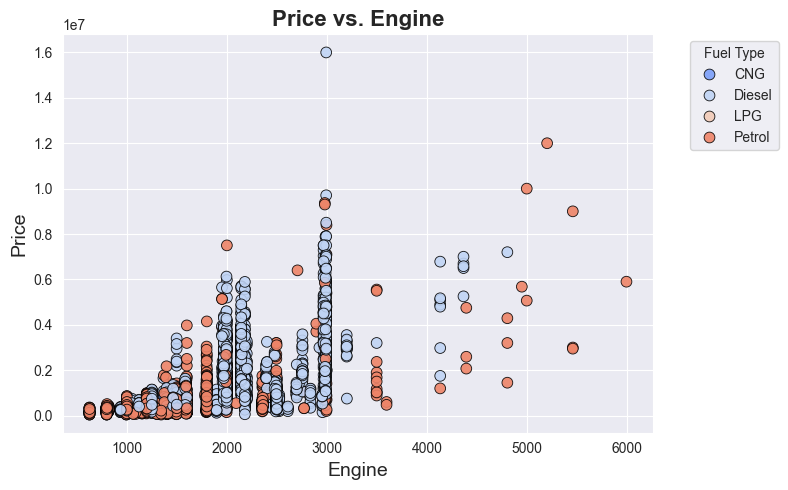

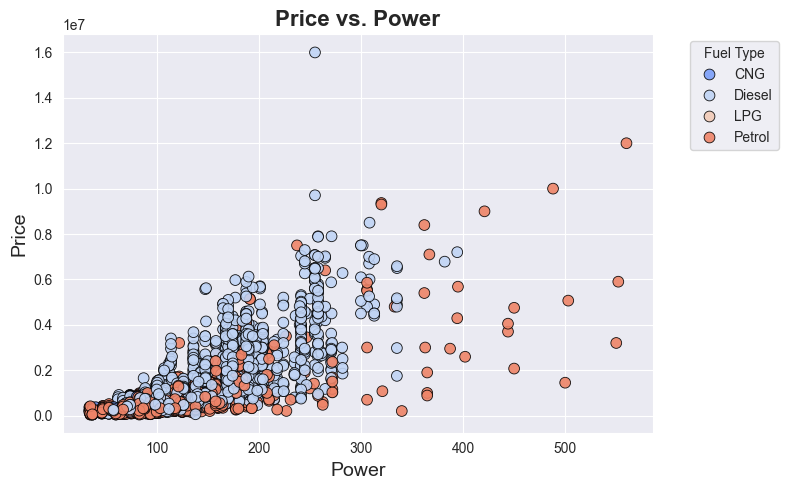

In [25]:
#lets plot scatterplots for the numerical features
sns.set_style("darkgrid")
sns.set_palette("Set1")
for feature in ["Kilometers_Driven", "Mileage", "Engine", "Power"]:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df[feature], y=df["Price"], hue=df["Fuel_Type"],
                    palette="coolwarm", s=60, alpha=0.9, edgecolor="black")
    plt.title(f'Price vs. {feature}', fontsize=16, fontweight='bold')
    plt.xlabel(feature, fontsize=14)
    plt.ylabel("Price", fontsize=14)
    plt.legend(title="Fuel Type", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

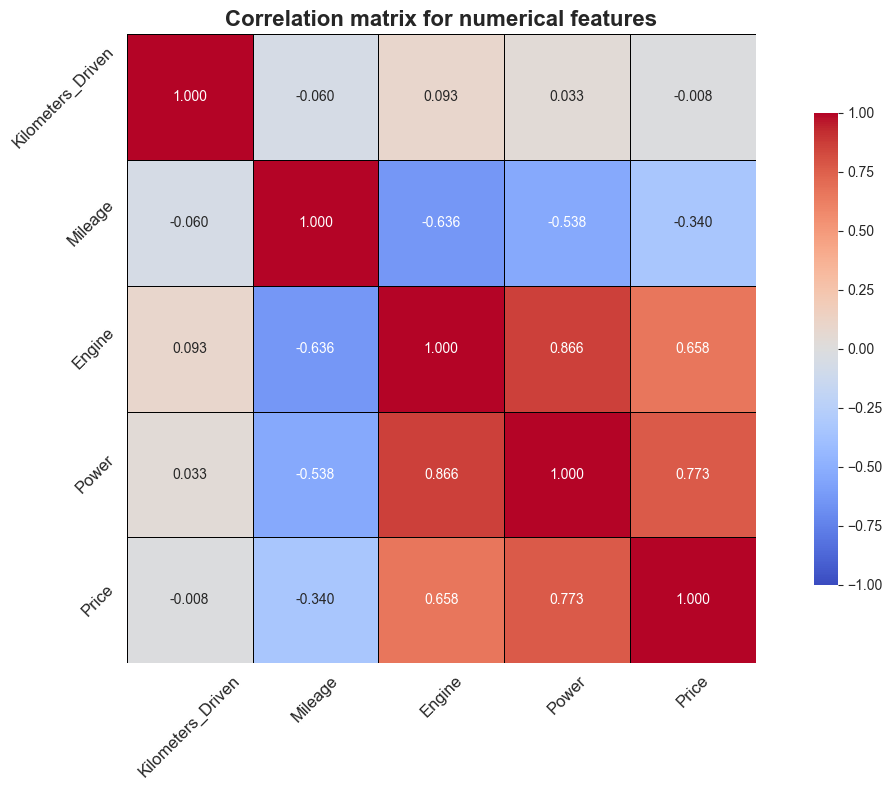

In [26]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_features].corr(), 
            annot=True,
            fmt=".3f",
            cmap="coolwarm",
            linewidths=0.5, 
            linecolor="black",
            vmin=-1, 
            vmax=1,
            square=True, 
            cbar_kws={"shrink": 0.75})  
plt.title("Correlation matrix for numerical features", fontsize=16, fontweight="bold")
plt.xticks(fontsize=12, rotation=45)
plt.yticks(rotation=45,fontsize=12)
plt.tight_layout()
plt.show()

Upon viewing the histograms we notice that all plots except for Mileage are rightly skewed. The boxplots were able to help us identify outliers both in the categorical and numerical feature, thus we'll need to do some cleaning to remove the outliers.
From the correlation matrix,we can draw the following conclusions:

The **Kilometers Driven** feature shows a very low correlation with Price (-0.008), meaning it might not significantly affect the car's price. This is somewhat surprising as typically, higher mileage would be expected to lower a car's value. 

The correlation between **Mileage** and **Price** is moderately negative (-0.340), indicating that cars with higher mileage generally have a lower price. This makes sense since higher fuel efficiency (lower mileage) could lead to a lower price.

**Engine** and **Power** have a high positive correlation with each other (0.866), suggesting multicollinearity. They are both strongly correlated with Price (0.658 and 0.773, respectively), indicating that they are strong predictors of car price. However, due to multicollinearity, using both might lead to redundancy, and it might be necessary to combine or drop one of these features to avoid issues in some models.

Lets remove the outliers and normalize the numerical features

In [27]:
#lets create a function to remove outliers
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR =Q3 -Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df =df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

#lets create a function to perform normalisation
def normalize(df, columns):
    for col in columns:
        if (df[col] <= 0).any():
            df[col]=df[col] + 1
        df[col]=np.log(df[col])
    return df

In [28]:
#applying the functions
ddf =remove_outliers(df.copy(),numerical_features)
new_df =normalize(ddf.copy(),numerical_features)

Lets visualize and see if we have removed some outliers and performed normalization to our numerical features 

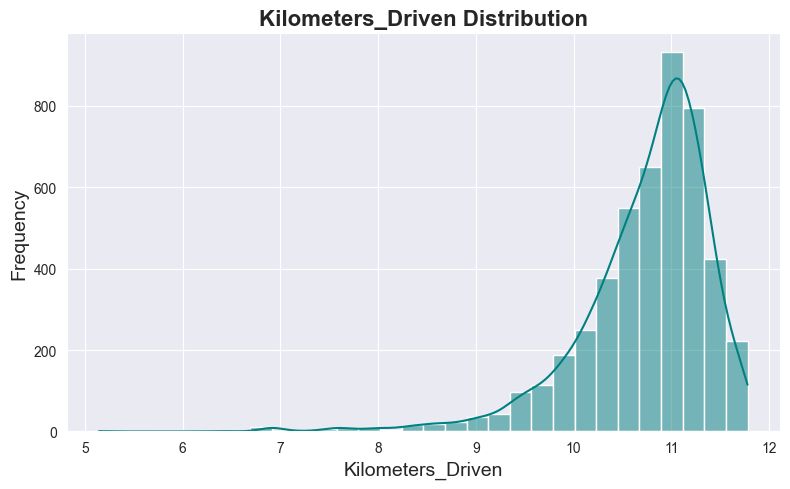

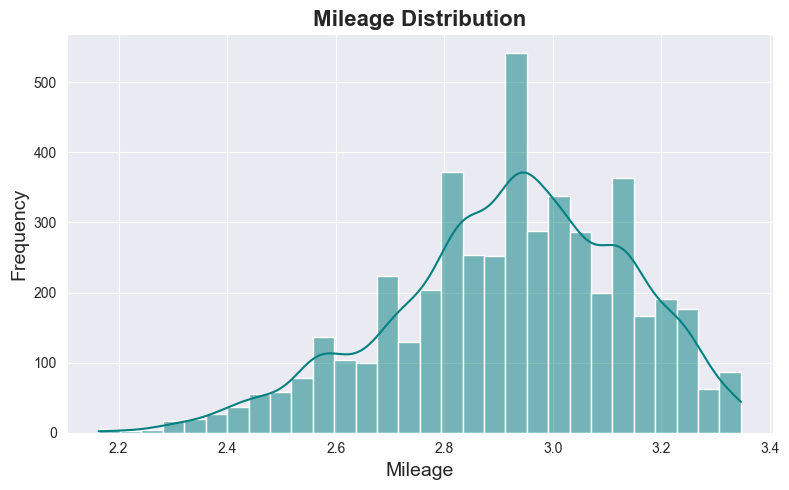

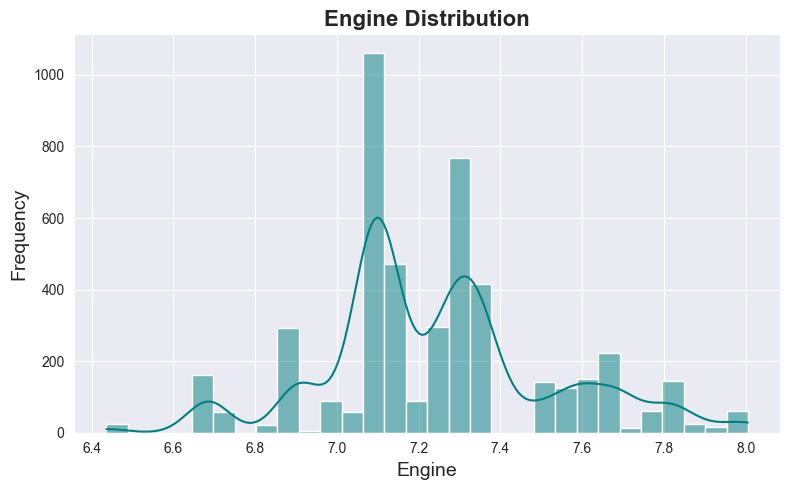

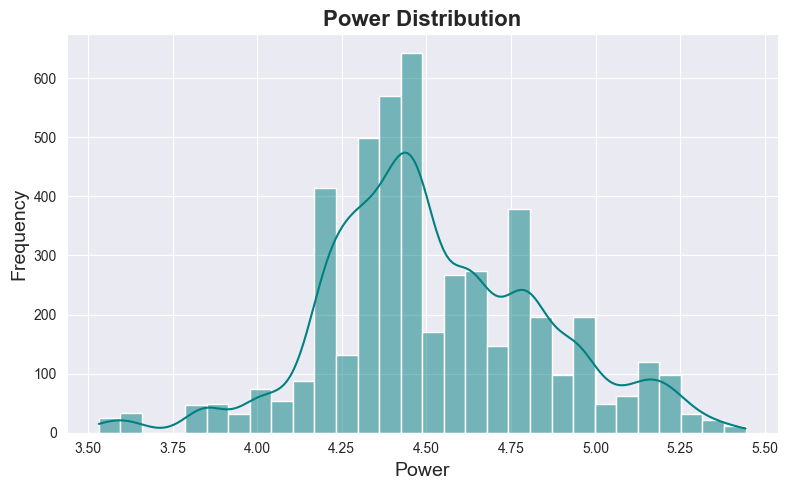

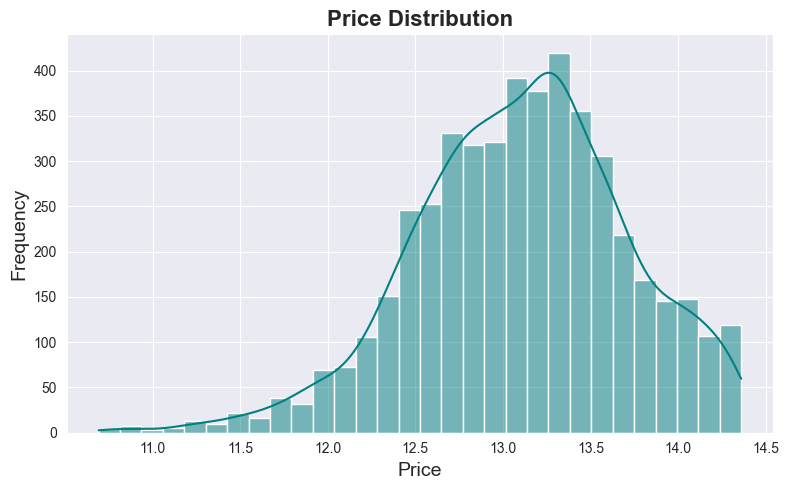

In [29]:
# Set a modern style and palette
sns.set_style("darkgrid")
for feature in numerical_features:
    plt.figure(figsize=(8, 5)) 
    sns.histplot(new_df[feature], bins=30, color="teal", kde=True)
    plt.title(f"{feature} Distribution", fontsize=16, fontweight="bold")
    plt.xlabel(feature, fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.grid(True, linestyle="solid")
    plt.tight_layout() 
    plt.show()

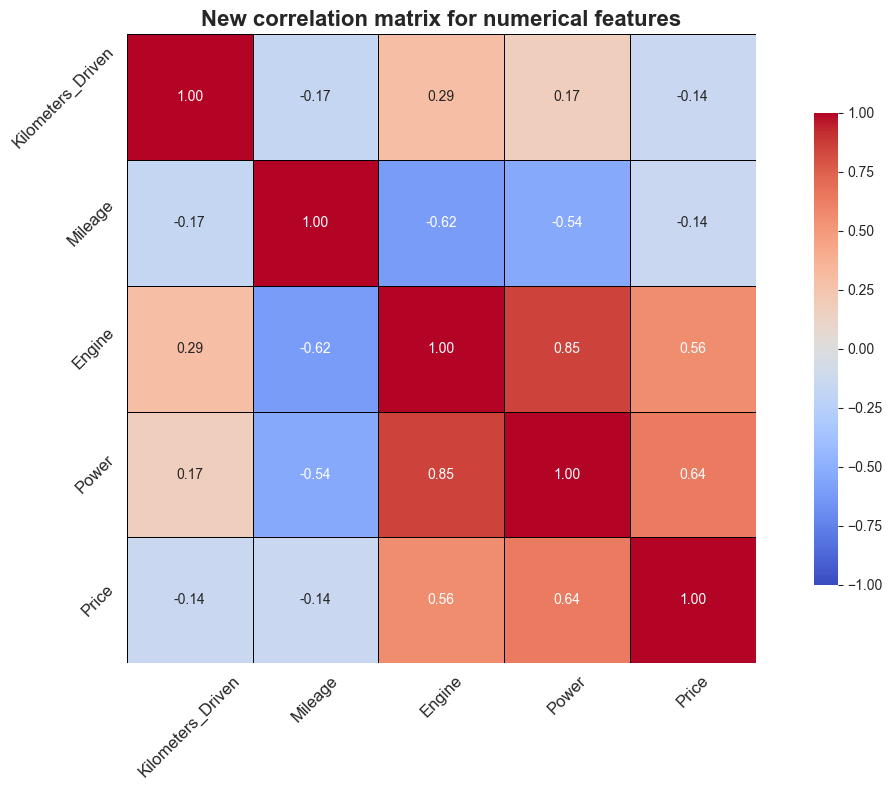

In [30]:
#lets plot the previous correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(new_df[numerical_features].corr(), 
            annot=True, fmt=".2f",  
            cmap="coolwarm", 
            linewidths=0.5,
            linecolor="black",
            vmin=-1, 
            vmax=1,  
            square=True, 
            cbar_kws={"shrink": 0.75}) 
plt.title("New correlation matrix for numerical features", fontsize=16, fontweight="bold")
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=45)
plt.tight_layout()
plt.show()

Lets check if our data is tidy

In [31]:
display(new_df.head())
print(f"Shape of the new dataset: {new_df.shape}","\n")
print(f"New dataset information: {new_df.info()}","\n")
print(f"Missing values present: {new_df.isna().any()}","\n")

,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Price
0,11.184421,CNG,Manual,3.280911,6.905753,4.063198,12.072541
1,10.621327,Diesel,Manual,2.979095,7.366445,4.837868,14.038654
2,10.736397,Petrol,Manual,2.901422,7.089243,4.485260,13.017003
3,11.373663,Diesel,Manual,3.033510,7.129298,4.485936,13.304685
5,11.225243,LPG,Manual,3.049273,6.701960,4.010963,12.367341


Shape of the new dataset: (4774, 7) 

<class 'pandas.core.frame.DataFrame'>
Index: 4774 entries, 0 to 6018
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Kilometers_Driven  4774 non-null   float64 
 1   Fuel_Type          4774 non-null   category
 2   Transmission       4774 non-null   category
 3   Mileage            4774 non-null   float64 
 4   Engine             4774 non-null   float64 
 5   Power              4774 non-null   float64 
 6   Price              4774 non-null   float64 
dtypes: category(2), float64(5)
memory usage: 233.4 KB
New dataset information: None 

Missing values present: Kilometers_Driven    False
Fuel_Type            False
Transmission         False
Mileage              False
Engine               False
Power                False
Price                False
dtype: bool 



* From the distribution plot and heatmap,our new dataset is now clean and ready for modelling.

## Modelling

In [32]:
#lets create our features and target variable
X =new_df.drop("Price", axis=1)
y =new_df["Price"]

Recall that Fuel Type and Transmission are categorical thus we'll use OneHotEncoder to convert them to a format that can be used by machine learning model which is numerical.

In [33]:
#lets encode the categorical features
ohe =OneHotEncoder(sparse_output=False)
X_encoded = pd.DataFrame(
    ohe.fit_transform(X[categorical_features]),
    columns=ohe.get_feature_names_out(categorical_features),
    index=X.index
)
#lets drop the original categorical columns and concatenate the encoded columns
X = X.drop(categorical_features, axis=1)
X = pd.concat([X, X_encoded], axis=1)
y= y.loc[X.index]

print(f"The shape of the features: {X.shape}")
print(f"The shape of the target: {y.shape}")
display(X.head())
display(y.head())

The shape of the features: (4774, 10)
The shape of the target: (4774,)


,Kilometers_Driven,Mileage,Engine,Power,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
0,11.184421,3.280911,6.905753,4.063198,1.0,0.0,0.0,0.0,0.0,1.0
1,10.621327,2.979095,7.366445,4.837868,0.0,1.0,0.0,0.0,0.0,1.0
2,10.736397,2.901422,7.089243,4.485260,0.0,0.0,0.0,1.0,0.0,1.0
3,11.373663,3.033510,7.129298,4.485936,0.0,1.0,0.0,0.0,0.0,1.0
5,11.225243,3.049273,6.701960,4.010963,0.0,0.0,1.0,0.0,0.0,1.0


0    12.072541
1    14.038654
2    13.017003
3    13.304685
5    12.367341
Name: Price, dtype: float64

We'll begin with the Random Forest Regressor as it's less likely to overfit compared to some other models because they average the results from multiple decision trees. Each tree is trained on a subset of the data, reducing variance and avoiding overfitting that might occur with a single tree.

In [34]:
#lets split our datasets
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.25,random_state=42
)
#lets do a for loop for the n_estimators
n_estimators_range = [10, 50, 100, 200, 300, 400, 500]
mse_list = []
r2_list = []
# Build the Random Forest Model with n_estimators
for n in n_estimators_range:
    rf_model = RandomForestRegressor(n_estimators=n, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    #getting the evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_list.append(mse)
    r2_list.append(r2)
    
    print(f"n_estimators: {n}, Mean Squared Error (MSE): {mse:.2f}, R-squared (R2) Score: {r2:.2f}")

n_estimators: 10, Mean Squared Error (MSE): 0.11, R-squared (R2) Score: 0.71
n_estimators: 50, Mean Squared Error (MSE): 0.09, R-squared (R2) Score: 0.75
n_estimators: 100, Mean Squared Error (MSE): 0.09, R-squared (R2) Score: 0.75
n_estimators: 200, Mean Squared Error (MSE): 0.09, R-squared (R2) Score: 0.75
n_estimators: 300, Mean Squared Error (MSE): 0.09, R-squared (R2) Score: 0.75
n_estimators: 400, Mean Squared Error (MSE): 0.09, R-squared (R2) Score: 0.75
n_estimators: 500, Mean Squared Error (MSE): 0.09, R-squared (R2) Score: 0.75


Lets perform some hyparameter tuning and see if indeed our model has an accuracy of 75%

In [35]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.25, random_state=42
)
#defining our hypeparameters
params={
    "n_estimators": [50,100,200],
    "max_depth": [None,10,20,30],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1,2,4],
    "max_features": ["sqrt","log2",None]
}
#lets build our model
rf= RandomForestRegressor(random_state=42)
GCV=GridSearchCV(
    estimator=rf,
    param_grid=params,
    cv=5,
    n_jobs= -1,
    scoring ="r2",
    verbose = 2
)
GCV.fit(X_train, y_train)
best_params= GCV.best_params_
best_rf_model = GCV.best_estimator_
print(f"best params: {best_params}")
y_pred_rf = best_rf_model.predict(X_test)
#getting the evaluation metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Evaluation metrics: Mean Squared Error (MSE): {mse_rf:.2f}, R-squared (R2) Score: {r2_rf:.2f}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
best params: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Evaluation metrics: Mean Squared Error (MSE): 0.09, R-squared (R2) Score: 0.76


* Lets try other models  and see if our accuracy score of 76% will vary

In [42]:
os.environ["LOKY_MAX_CPU_COUNT"] = str(os.cpu_count()) #lets specify the cores to be used
models = {
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost Regressor": XGBRegressor(objective="reg:squarederror", random_state=42),
    "LightGBM Regressor": LGBMRegressor(random_state=42)
}

model_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_results[name] = {"MSE": mse, "R2": r2}
    print(f"{name} - Mean Squared Error (MSE): {mse:.2f}, R-squared (R2) Score: {r2:.2f}")
#lets include the Tuned Random Forest
model_results["Tuned Random Forest"] = {"MSE": mse, 'R2': r2}

print("\nModel Comparison Results:\n")
for model_name, metrics in model_results.items():
    print(f"{model_name}: MSE = {metrics['MSE']:.2f}, R2 = {metrics['R2']:.2f}")

Linear Regression - Mean Squared Error (MSE): 0.15, R-squared (R2) Score: 0.59
Gradient Boosting - Mean Squared Error (MSE): 0.11, R-squared (R2) Score: 0.71
XGBoost Regressor - Mean Squared Error (MSE): 0.09, R-squared (R2) Score: 0.76
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000735 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 781
[LightGBM] [Info] Number of data points in the train set: 3580, number of used features: 9
[LightGBM] [Info] Start training from score 13.108445
LightGBM Regressor - Mean Squared Error (MSE): 0.09, R-squared (R2) Score: 0.76

Model Comparison Results:

Linear Regression: MSE = 0.15, R2 = 0.59
Gradient Boosting: MSE = 0.11, R2 = 0.71
XGBoost Regressor: MSE = 0.09, R2 = 0.76
LightGBM Regressor: MSE = 0.09, R2 = 0.76
Tuned Random Forest: MSE = 0.09, R2 = 0.76


* Lets visualize how the model has performed

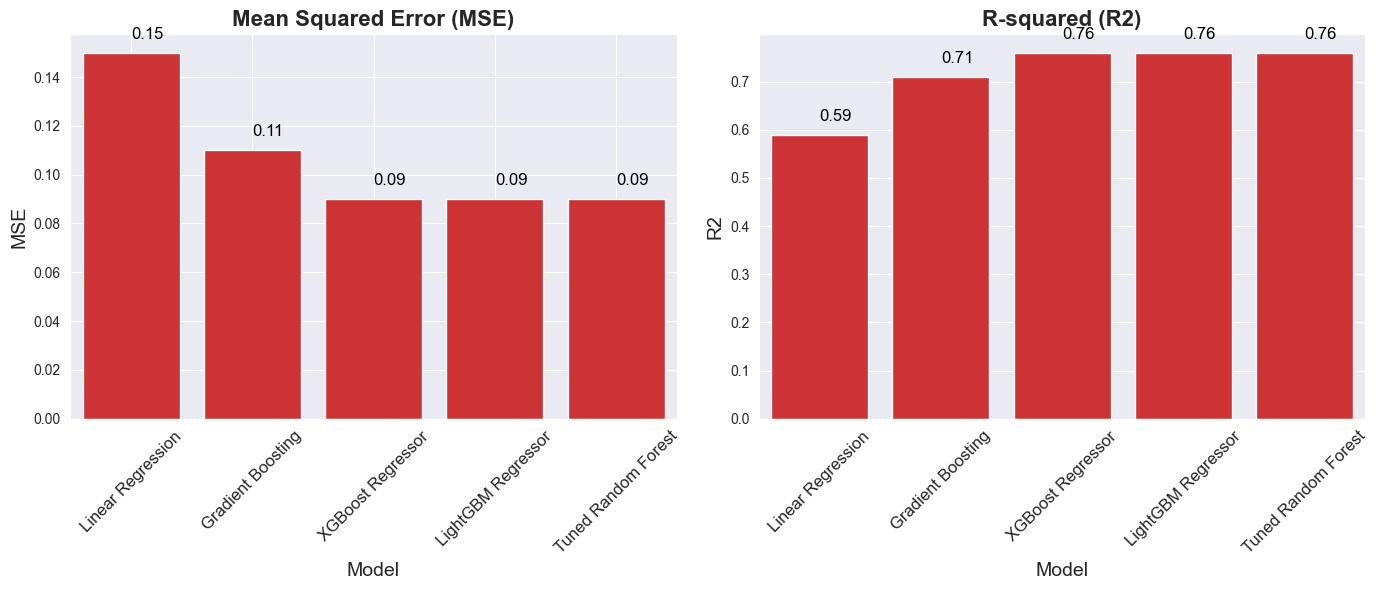

In [37]:
#lets create a DataFrame for easier plotting
models = ["Linear Regression", "Gradient Boosting", "XGBoost Regressor", "LightGBM Regressor", "Tuned Random Forest"]
mse_scores = [0.15, 0.11, 0.09, 0.09, 0.09]
r2_scores = [0.59, 0.71, 0.76, 0.76, 0.76]

model_df = pd.DataFrame({
    "Model": models,
    "MSE": mse_scores,
    "R2": r2_scores
})

sns.set_style("darkgrid")
plt.figure(figsize=(14, 6))
# Bar plot for MSE
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x="Model", y="MSE", data=model_df)
plt.title("Mean Squared Error (MSE)", fontsize=16, fontweight="bold")
plt.xticks(rotation=45, fontsize=12)
plt.xlabel("Model", fontsize=14)
plt.ylabel("MSE", fontsize=14)
# Annotating bars with values
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.2f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 xytext = (0, 10), 
                 textcoords = "offset points", 
                 fontsize=12, color="black")
plt.grid(axis="x", linestyle="solid")

# Bar plot for R2
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x="Model", y="R2", data=model_df)
plt.title("R-squared (R2)", fontsize=16, fontweight="bold")
plt.xticks(rotation=45,fontsize=12)
plt.xlabel("Model", fontsize=14)
plt.ylabel("R2", fontsize=14)
# Annotating bars with values
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), ".2f"), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 xytext = (0, 10), 
                 textcoords = "offset points", 
                 fontsize=12,
                 color="black")
plt.grid(axis="y", linestyle="solid")
plt.tight_layout()
plt.show()

### Saving our model 

In [38]:
# Save the model to a file
joblib.dump(best_rf_model, 'Tuned_Random_forest_model.pkl')
print("Model saved as 'Tuned_Random_forest_model.pkl'")

Model saved as 'Tuned_Random_forest_model.pkl'


## Communication

Since we are predicting car prices, it is essential to address their importance, how they contribute to the model's performance and any insights they may provide.
Lets calculate the feature importance

In [39]:
#lets get the feature importances
feature_importances = best_rf_model.feature_importances_

Lets visualize the importances

In [40]:
# Create a DataFrame for easier visualization
total_importance = np.sum(feature_importances)
importance_percentages = (feature_importances / total_importance) * 100
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance [%]': importance_percentages
})
display(features_df.sort_values(by="Importance [%]", ascending= False).head(10))

,Feature,Importance [%]
3,Power,34.792832
2,Engine,20.723258
1,Mileage,14.496499
0,Kilometers_Driven,13.639819
5,Fuel_Type_Diesel,5.607996
9,Transmission_Manual,4.561087
7,Fuel_Type_Petrol,3.114963
8,Transmission_Automatic,2.954996
4,Fuel_Type_CNG,0.078566
6,Fuel_Type_LPG,0.029986


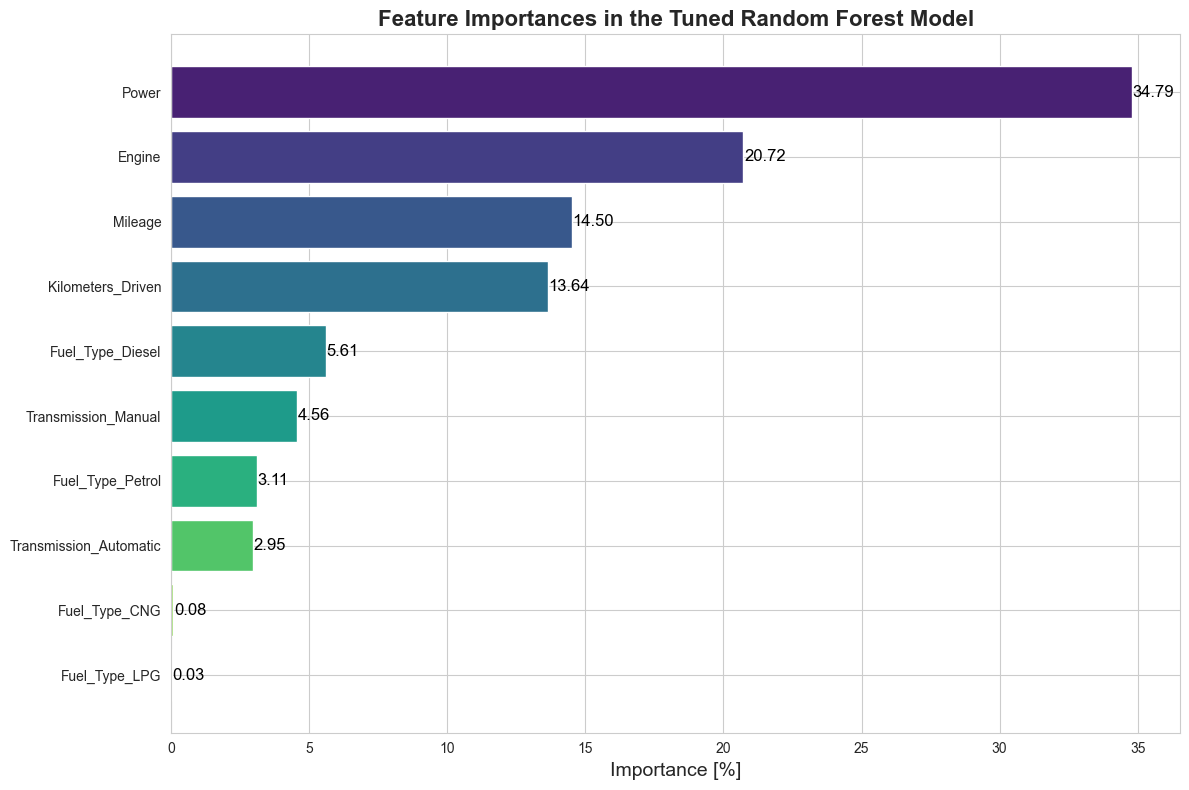

In [41]:
# Set Seaborn style for aesthetics
sns.set_style("whitegrid")
features_df = features_df.sort_values(by="Importance [%]", ascending=False)
plt.figure(figsize=(12, 8))
ax = plt.barh(features_df["Feature"], features_df["Importance [%]"], color=sns.color_palette("viridis", n_colors=len(features_df)))
plt.gca().invert_yaxis()
#Annotating bars with values
for i in ax.patches:
    plt.text(i.get_width() + 0.02,
             i.get_y() + i.get_height()/2., 
             f"{i.get_width():.2f}", 
             va="center",
             ha="left", 
             fontsize=12, 
             color="black")
plt.xlabel("Importance [%]", fontsize=14)
plt.title("Feature Importances in the Tuned Random Forest Model", fontsize=16, fontweight="bold")
plt.grid(axis="x", linestyle="solid")
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

As we know the importance values sum up to 1, where a higher value indicates a stronger influence on the model's prediction.

From the visualisation **Power** is the most significant feature affecting the prediction of car prices accounting for **38%** of the model's prediction. We can all agree with these because cars with high horsepower are often more expensive due to their enhanced performance capabilities.
The second most important feature is the **Engine** capacity which contributes **21%** to the model's prediction. This refelcts the consumer preferences for cars with more powerful and potentially more fuel efficient engines indicating cars with larger engines tend to be more expensive.
The third most significant feature is the **Mileage** which accounts for **15%** of the model's prediction. Mileage is always a crucial factor for many buyers as it reflects the effeciency of the car. Since cars with better mileage tend to have more value, this explains why this feature contributes significantly to price prediction
The number of **Kilometers Driven** by the car also plays a significant role, with an importance score of **14%**. Generally, the more a car has been driven, the more it depreciates in value. Generally, the more kilometers a car has been driven, the more it depreciates in value due to potential wear and tear. This finding aligns with the typical depreciation patterns in the used car market.
When we look at the **Fuel_Type**, **diesel** cars hold a moderate importance which could reflect market dynamics where diesel cars may be mmore economical over long distances. **Petrol** cars have a lower impact on price predictions, possibly because they are more common and their resale values are more predictable.The cars that use **CNG** and **LPG** do not significantly affect the pricing of cars as they have minimal impact on the model.
For **Transmission** it also had a modest impact on car prices with **manual** transmissions having slightly more influence than the **automatic** cars. This colud be due to cost differences in maintenance & fuel efficiency or market preferences. 


### Communication to Shareholders

We developed a predictive model using a **Random Forest Regressor** to forecast used car prices based on key features such as power, engine size, mileage, and kilometers driven. The model has demonstrated strong performance, with a high **R-squared (R2) score** of **0.77** and a low **Mean Squared Error (MSE)** of **0.09**, indicating that it accurately predicts car prices and can significantly inform pricing strategies.

* Key Findings
The most influential features affecting car prices are:
**Power:** The car’s horsepower is the most critical predictor of price. Higher power correlates with higher car values.
**Engine Size:** Larger engine sizes also contribute significantly to car prices.
**Mileage** and **Kilometers Driven:** Both features are important, with higher mileage and more kilometers driven generally leading to lower prices.
Less Impactful Features: While fuel type and transmission type have some influence, their effect on car prices is relatively smaller compared to power and engine size. This suggests that these factors are less critical in determining price variations but still relevant in specific contexts.

## Recommendations

When setting prices or evaluating car values, focus mostly on **Power** and **Engine capacity** as they are the most influential factors. These features should be prominently considered in pricing algorithms and valuation models.
Use the insights from power and engine size to target specific customer segments that value these features. Highlighting these attributes can enhance marketing strategies and attract customers seeking high-performance cars.

Although Fuel and Transmission were less impactful understand regional or market-specific preferences for fuel types and transmission. Tailor inventory and promotions to match these preferences, potentially increasing market reach and sales.
* Enhance Data Collection and Feature Engineering:
Invest in further data collection to capture more granular details about less influential features. Explore advanced feature engineering to uncover additional insights that could refine the model’s predictions and improve accuracy.
* Deploy the Model in Pricing and Valuation:
Implement the Random Forest model in dynamic pricing tools and valuation systems since it can aid in setting competitive prices and enhancing overall profitability.

## Conclusion

The Random Forest model identifies **Power, Engine Size, Mileage** and **Kilometers Driven** as the most critical features influencing car prices. These features reflect a vehicle's performance capabilities, fuel efficiency, and usage history, aligning with common industry insights regarding what drives used car prices.
Features like **Fuel Type** and **Transmission Type** have a moderate to minimal impact on the model's predictions. While they are important, their influence is relatively smaller compared to the core performance-related features.
Features with near-zero importance, such as **Fuel_Type_CNG** and **Fuel_Type_LPG,** indicate that they have little to no effect on the model's ability to predict car prices, which could be due to low variance or limited representation in the dataset.

The Random Forest model provides a reliable and effective tool for predicting car prices, with clear insights into the most significant factors affecting valuation. By integrating these findings into our business strategies, we can enhance pricing accuracy, better meet customer needs and drive growth.